In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# Loading the dataset
url = "https://raw.githubusercontent.com/DataGlacier/DataSets/master/Cab_Data.csv"
df = pd.read_csv(url)

# Previewing data
df.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [2]:
# Check basic info about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Get summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [4]:
# Mean imputation for 'Price Charged'
df['Price Charged'] = df['Price Charged'].fillna(df['Price Charged'].mean())


# Median imputation for 'Cost of Trip'
df['Cost of Trip'] = df['Cost of Trip'].fillna(df['Cost of Trip'].median())




In [5]:
df.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
df.isnull().sum()



,0
Transaction ID,0
Date of Travel,0
Company,0
City,0
KM Travelled,0
Price Charged,0
Cost of Trip,0


In [7]:
# Check rows where 'Price Charged' was previously NaN
df[df['Price Charged'].isnull()]



,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


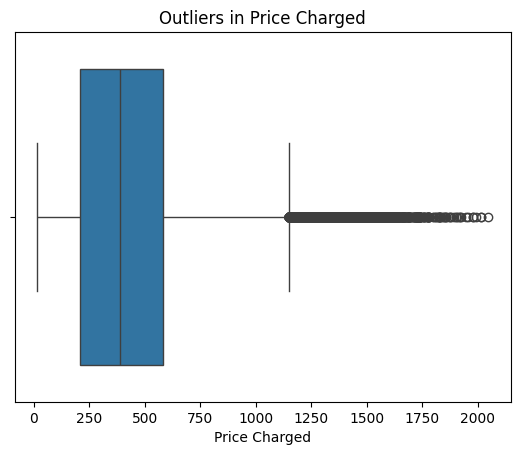

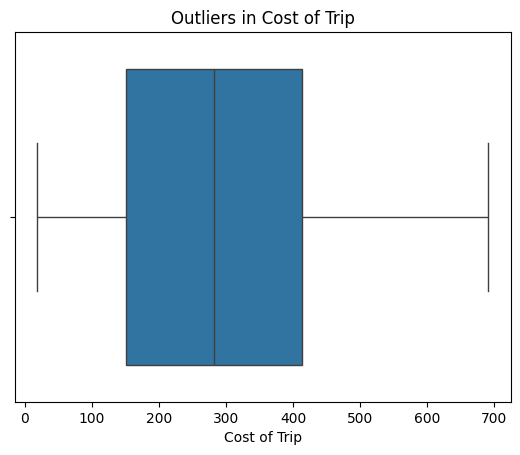

In [10]:
#checking distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplot for Price Charged
sns.boxplot(x=df['Price Charged'])
plt.title('Outliers in Price Charged')
plt.show()

# Plot boxplot for Cost of Trip
sns.boxplot(x=df['Cost of Trip'])
plt.title('Outliers in Cost of Trip')
plt.show()



In [11]:
#removal of outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_df

# Remove outliers from Price Charged
df = remove_outliers_iqr(df, 'Price Charged')

# Remove outliers from Cost of Trip
df = remove_outliers_iqr(df, 'Cost of Trip')



Shape after removing outliers: (353434, 7)


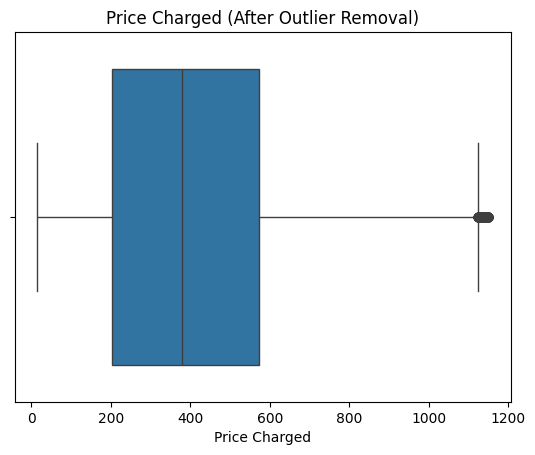

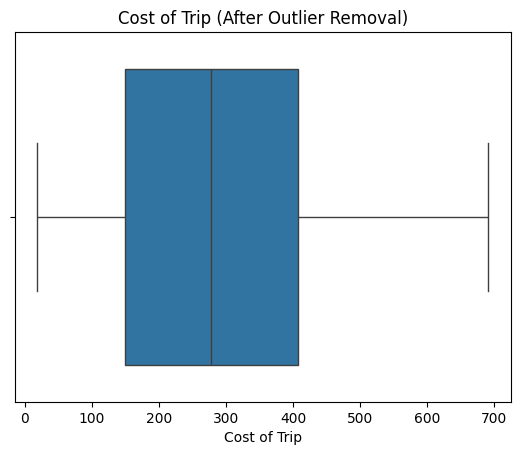

In [12]:
# Check new shape
print("Shape after removing outliers:", df.shape)

# Check boxplots again
sns.boxplot(x=df['Price Charged'])
plt.title('Price Charged (After Outlier Removal)')
plt.show()

sns.boxplot(x=df['Cost of Trip'])
plt.title('Cost of Trip (After Outlier Removal)')
plt.show()


In [13]:
#reloading fresh dataset
url = "https://raw.githubusercontent.com/DataGlacier/DataSets/master/Cab_Data.csv"
df = pd.read_csv(url)


In [14]:
# Fill 'Price Charged' with company-specific mean
df['Price Charged'] = df.groupby('Company')['Price Charged'].transform(
    lambda x: x.fillna(x.mean())
)

# Fill 'Cost of Trip' with company-specific mean
df['Cost of Trip'] = df.groupby('Company')['Cost of Trip'].transform(
    lambda x: x.fillna(x.mean())
)



In [15]:
#checking for missing values
df.isnull().sum()


,0
Transaction ID,0
Date of Travel,0
Company,0
City,0
KM Travelled,0
Price Charged,0
Cost of Trip,0


In [16]:
# IQR function
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply IQR to both columns
df = remove_outliers_iqr(df, 'Price Charged')
df = remove_outliers_iqr(df, 'Cost of Trip')


In [17]:
# Final check
df.isnull().sum()
df.shape
df.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [18]:
df.shape


(353434, 7)